In [50]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
# Step 1: Load VGG16 model pre-trained on ImageNet dataset
base_model = VGG16(weights='imagenet', include_top=False)


In [52]:
# Step 2: Function to extract features using VGG16
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = base_model.predict(x)
    return features.flatten()

In [53]:
# Step 3: Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [54]:
# Function to augment images and extract features
def augment_and_extract_features(img_path, label):
    features = []
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    for _ in range(5):  # Generate 5 augmented images
        aug_img = next(datagen.flow(x, batch_size=1))
        aug_img = preprocess_input(aug_img)
        feature = base_model.predict(aug_img)
        features.append(feature.flatten())
    return features, [label] * 5

In [55]:
# Load dataset and extract features
actor_features = []
labels = []
actor_dir = "D:\\Programming\\Project\\dataset_3\\amitabh_bachchan"

In [56]:
for actor_image in os.listdir(actor_dir):
    features, label = augment_and_extract_features(os.path.join(actor_dir, actor_image), 1)
    actor_features.extend(features)
    labels.extend(label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [57]:
other_actors_dir = "D:\\Programming\\Project\\test"
for other_actor_image in os.listdir(other_actors_dir):
    features, label = augment_and_extract_features(os.path.join(other_actors_dir, other_actor_image), 0)
    actor_features.extend(features)
    labels.extend(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [58]:
# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(actor_features, labels, test_size=0.2, random_state=42)

In [59]:
# Step 5: Dimensionality Reduction and Normalization
pipeline = Pipeline([
    ('pca', PCA(n_components=100)),  # Adjust the number of components as needed
    ('knn', KNeighborsClassifier())
])

In [60]:
# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [61]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=100)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']})

In [62]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

In [63]:
# Step 7: Evaluate the model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.864516129032258


In [64]:
# Step 8: Transform the actor features using PCA and predict the best 4 actors whose resemblance is similar to the trained actor/actress
pca = best_model.named_steps['pca']
knn = best_model.named_steps['knn']

In [65]:
# Transform the entire dataset using the fitted PCA
actor_features_transformed = pca.transform(actor_features)


In [66]:
# Get distances and indices of nearest neighbors for each actor
predicted_distances, predicted_indices = knn.kneighbors(actor_features_transformed, n_neighbors=4, return_distance=True)



In [67]:
# Debug: Print distances and indices
print("Predicted Distances:\n", predicted_distances)
print("Predicted Indices:\n", predicted_indices)

Predicted Distances:
 [[1.05448150e-11 4.11452861e+03 4.89038336e+03 5.09778258e+03]
 [9.94115901e-12 4.11452861e+03 4.33530128e+03 4.82345937e+03]
 [3.09302734e+03 4.65326077e+03 4.76611462e+03 5.10311512e+03]
 ...
 [1.34462788e-11 4.78531923e+03 5.66571546e+03 5.76812911e+03]
 [1.01804259e-11 4.23956293e+03 4.27883068e+03 4.33363747e+03]
 [1.22659938e-11 4.44655494e+03 4.58782594e+03 4.96057596e+03]]
Predicted Indices:
 [[197 551 189  99]
 [551 197 613 164]
 [497 544  36 273]
 ...
 [541  27  63 483]
 [161 213 484 584]
 [229 617 128 285]]


In [68]:
# Extract the indices of top 4 actors with the smallest distance
resemblance_indices = np.argsort(predicted_distances[:, 0])[-4:]

In [69]:
# Ensure not to go out of bounds
if len(resemblance_indices) < 4:
    resemblance_indices = np.argsort(predicted_distances[:, 0])[:4]

# Debug: Print number of images in other_actors_dir
other_actor_images = os.listdir(other_actors_dir)
print("Number of images in other_actors_dir:", len(other_actor_images))

# Debug: Print resemblance indices and check validity
for idx in resemblance_indices:
    if idx >= len(other_actor_images):
        print(f"Index {idx} out of bounds for other_actor_images")

# Extracting the best actors paths (adjust the logic to match the number of features per image)
# Since we generated 5 augmented images for each original image, we need to map the indices back to original images
unique_resemblance_indices = set(idx // 5 for idx in resemblance_indices)

# Debug: Print unique resemblance indices
print("Unique Resemblance Indices:\n", unique_resemblance_indices)

Number of images in other_actors_dir: 105
Index 344 out of bounds for other_actor_images
Index 490 out of bounds for other_actor_images
Index 434 out of bounds for other_actor_images
Unique Resemblance Indices:
 {16, 98, 68, 86}


In [70]:
# Ensure indices are within bounds
valid_indices = [idx for idx in unique_resemblance_indices if idx < len(other_actor_images)]

# Debug: Print valid indices
print("Valid Indices:\n", valid_indices)

Valid Indices:
 [16, 98, 68, 86]


In [71]:
# Extracting the best actors paths
best_actors = [os.path.join(other_actors_dir, other_actor_images[idx]) for idx in valid_indices]

# Debug: Print best actors paths
print("Best Actors Paths:\n", best_actors)

Best Actors Paths:
 ['D:\\Programming\\Project\\test\\1432cbc7fc.jpg', 'D:\\Programming\\Project\\test\\9eefe79e39.jpg', 'D:\\Programming\\Project\\test\\692bdcb781.png', 'D:\\Programming\\Project\\test\\8a4a71621d.png']


Displaying image: D:\Programming\Project\test\1432cbc7fc.jpg
Displaying image: D:\Programming\Project\test\9eefe79e39.jpg
Displaying image: D:\Programming\Project\test\692bdcb781.png
Displaying image: D:\Programming\Project\test\8a4a71621d.png


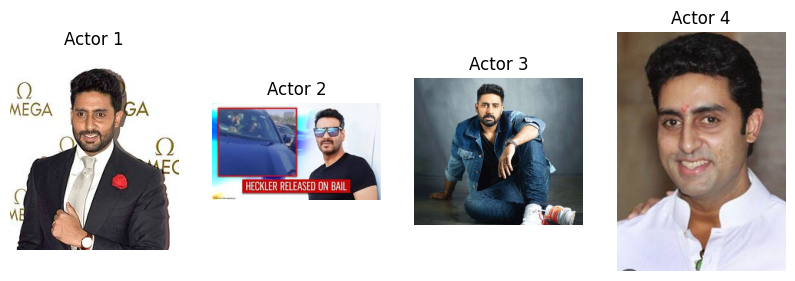

In [72]:
# Display the images
plt.figure(figsize=(10, 5))
for i, actor_image_path in enumerate(best_actors):
    print(f"Displaying image: {actor_image_path}")  # Debug print
    img = mpimg.imread(actor_image_path)
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Actor {i + 1}")
    plt.axis('off')
plt.show()